<h1 style="text-align:center">Trabajo Final - Primer Bimestre</h1>
***
* **Manejo y Visualización de Datos con Python**
***
Para la realización del presente trabajo se llevo a cabo la obtención de los datos estadísticos enfocados en el tema de **Hombres y Mujeres en el Ecuador** extraidos de [Ecuador en Cifras](http://www.ecuadorencifras.gob.ec/estadisticas/).

Librerías en python a utilizar: **jupyter, pandas, bokeh.**

Autores : **Jorge Hurtado - Jonathan Rosero**


In [5]:
# Se inicia con la importacion de pandas con un respectivo alias para facilitar su llamada
import pandas as pd

In [6]:
# Con el uso de ".read_csv" leemos el archivo con lo datos extraidos de EcuadorEnCifras
pd.read_csv('./data/ANALFABETISMO_POR_AREA_Y_GRUPOS_DE_EDAD.csv')

,GRANDES_GRUPOS_DE_EDAD,A_URBANA_M,A_URBANA_H,A_RURAL_M,A_RURAL_H,TOTAL_M,TOTAL_H
0,15-24 años,0.9,1.2,2.5,2.8,1.5,1.8
1,25-39 años,1.7,1.8,5.6,5.3,3.0,3.0
2,40-64 años,5.4,3.8,20.5,13.4,10.4,7.2
3,65 años y mas,19.5,12.8,49.7,34.3,31.6,22.4
4,Total nacional,4.3,3.1,14.2,10.3,7.7,5.8


In [7]:
# Como se va ha trabajar con el con los datos presentados anteriomente los guardamos en una variable
tabla1 = pd.read_csv('./data/ANALFABETISMO_POR_AREA_Y_GRUPOS_DE_EDAD.csv')

In [8]:
# Cabe mencionar el tipo de objeto de "tabla1" por lo que usaremos los atributos y metodos para explorar entre los datos
type(tabla1)

pandas.core.frame.DataFrame

In [9]:
# Pandas nos permite trabajar con subconjunto en caso de tener una tabla dividida bajo ciertos parametros
tabla1[['GRANDES_GRUPOS_DE_EDAD', 'A_URBANA_M', 'A_URBANA_H']]

,GRANDES_GRUPOS_DE_EDAD,A_URBANA_M,A_URBANA_H
0,15-24 años,0.9,1.2
1,25-39 años,1.7,1.8
2,40-64 años,5.4,3.8
3,65 años y mas,19.5,12.8
4,Total nacional,4.3,3.1


In [10]:
# A la vez que podemso buscar un dato en especifico
tabla1.loc[tabla1.GRANDES_GRUPOS_DE_EDAD == '40-64 años']

,GRANDES_GRUPOS_DE_EDAD,A_URBANA_M,A_URBANA_H,A_RURAL_M,A_RURAL_H,TOTAL_M,TOTAL_H
2,40-64 años,5.4,3.8,20.5,13.4,10.4,7.2


In [11]:
# También podemos utilizar funciones propias de pandas, en este caso sacamos la media con el uso de ".mean()"
mediaUrbanaM = tabla1.A_URBANA_M.mean()
mediaUrbanaM

6.36

In [12]:
# Podemos agrupar los datos por columnas
tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')['TOTAL_M'].mean()

GRANDES_GRUPOS_DE_EDAD
15-24 años         1.5
25-39 años         3.0
40-64 años        10.4
65 años y mas     31.6
Total nacional     7.7
Name: TOTAL_M, dtype: float64

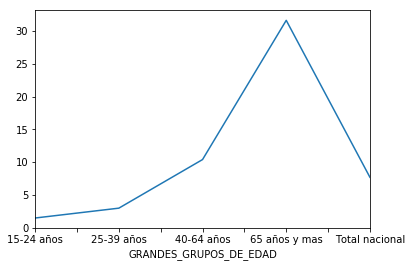

In [13]:
# Por parte de pandas sugiere la presentacion de los datos tras es uso de matplotlib
import matplotlib.pyplot

%matplotlib inline

gytle = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')['TOTAL_M'].mean()

gytle.plot()

In [14]:
# Importamos la libreria de bokeh para presentar los datos leidos por pandas
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

# Llamamos a output_notebook para mostrar mostrar los resultanos en el cuaderno de jupyter
output_notebook()

Loading BokehJS ...

In [15]:
# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas nombres de columnas a secuencias o matrices.
source = ColumnDataSource(group1)

# Mostramos los nombres de los datos albergados en source - donde buscamos los nombre de los datos que buscamos en concreto
source.data

{'A_RURAL_H_25%': array([  2.8,   5.3,  13.4,  34.3,  10.3]),
 'A_RURAL_H_50%': array([  2.8,   5.3,  13.4,  34.3,  10.3]),
 'A_RURAL_H_75%': array([  2.8,   5.3,  13.4,  34.3,  10.3]),
 'A_RURAL_H_count': array([ 1.,  1.,  1.,  1.,  1.]),
 'A_RURAL_H_max': array([  2.8,   5.3,  13.4,  34.3,  10.3]),
 'A_RURAL_H_mean': array([  2.8,   5.3,  13.4,  34.3,  10.3]),
 'A_RURAL_H_min': array([  2.8,   5.3,  13.4,  34.3,  10.3]),
 'A_RURAL_H_std': array([ nan,  nan,  nan,  nan,  nan]),
 'A_RURAL_M_25%': array([  2.5,   5.6,  20.5,  49.7,  14.2]),
 'A_RURAL_M_50%': array([  2.5,   5.6,  20.5,  49.7,  14.2]),
 'A_RURAL_M_75%': array([  2.5,   5.6,  20.5,  49.7,  14.2]),
 'A_RURAL_M_count': array([ 1.,  1.,  1.,  1.,  1.]),
 'A_RURAL_M_max': array([  2.5,   5.6,  20.5,  49.7,  14.2]),
 'A_RURAL_M_mean': array([  2.5,   5.6,  20.5,  49.7,  14.2]),
 'A_RURAL_M_min': array([  2.5,   5.6,  20.5,  49.7,  14.2]),
 'A_RURAL_M_std': array([ nan,  nan,  nan,  nan,  nan]),
 'A_URBANA_H_25%': array([  1.2,

In [16]:
# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas de nombres columnas, secuencias, matrices.
source = ColumnDataSource(group1)

# Creamos un objeto de figura
gph = figure(
    plot_height=250, plot_width=750, # Establecemos el tamaño
    x_range=group1,  # Establecemos el rango de x
    title='ANALFABETISMO POR AREA Y GRUPOS DE EDAD' # Establecemos un titulo para la grafica 
)

# Establecemos los atributos de "vbar()"
gph.vbar(
    x='GRANDES_GRUPOS_DE_EDAD', # Valores de x
    top='A_URBANA_H_mean', # Valores de y
    width=0.9, # El tamaño de las barras 
    line_color="white", # El color de la linea separadora
    source=source # Determinamos la fuente de datos
)

gph.xgrid.grid_line_color = None # Determinamos que en la grafica no se presente la linea de las x para hacer mas visible la grafica

gph.xaxis.axis_label = "AREA URBANA - HOMBRES" # Damos un nombre al eje x

gph.y_range.start = 0 # Modificamos para la presentación el rango inicial

show(gph) # Mostramos el objeto

In [17]:
# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas nombres de columnas a secuencias o matrices.
source = ColumnDataSource(group1)

# Creamos un objeto de figura 
p = figure(
    plot_height=250, plot_width=750, # Modificamos tamaño
    x_range=group1, # Determinamos el rango x va hacer el grupo1
    title='ANALFABETISMO POR AREA Y GRUPOS DE EDAD' # Ponemos un título a la grafica
)

# Establecemos los atributos de "line()"
p.line(
    x='GRANDES_GRUPOS_DE_EDAD',
    y='A_URBANA_M_mean', 
    color='#FF69B4', # Determinamos el color de la linea 
    source=source
)

p.xgrid.grid_line_color = None # No mostramos la linea separadora de x

p.xaxis.axis_label = "AREA URBANA - MUJERES" # Nombramos al eje x

p.y_range.start = 0 # Modificamos para la presentación el rango inicial 

show(p) # Presentamos

In [18]:
# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas nombres de columnas a secuencias o matrices.
source = ColumnDataSource(group1)

# Creamos un objeto de figura y establecemos su tamaño, rango, y le damos un título 
p = figure(plot_height=250, plot_width=750, x_range=group1,  title='ANALFABETISMO POR AREA Y GRUPOS DE EDAD')

# Podemos crear una grafica que combine dos o más plotting

p.line(x='GRANDES_GRUPOS_DE_EDAD', y='A_URBANA_M_mean', color='#FF69B4', source=source)

p.circle(
    x='GRANDES_GRUPOS_DE_EDAD', 
    y='A_URBANA_M_mean', 
    color='#FF69B4', 
    size=5.5, # Damos el tamaño de los circulos
    source=source
)

p.xaxis.axis_label = "AREA URBANA - MUJERES" # Damos un titulo al eje x

p.y_range.start = 0 # Modificamos para la presentación el rango inicial 

show(p)

In [23]:
# Importamos gridplot - para presentar varias graficas en una
from bokeh.layouts import gridplot

# Agrupamos los valores en base a la columna "GRANDES_GRUPOS_DE_EDAD" 
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

# Nos permite obtener Mapas nombres de columnas a secuencias o matrices.
source = ColumnDataSource(group1)

# Creamos un una variable con un diccionario que alberga las parametros de la figura ha crear
options = dict(plot_width=450, plot_height=450, # Tamaño
                x_range=group1, # Mandamos el rango de x
               tools="pan,wheel_zoom,box_zoom,reset,save") # Herramientas de bokeh a mostrar

# Creamos un objeto de figura y establecemos su tamaño, rango, y le damos un título 
graph1 = figure(title='TOTAL MUJERES', # Le damos un título
               **options # Enviamos los atributos albergados en options
              )

graph2 = figure(title='TOTAL HOMBRES', **options)

graph1.vbar(x='GRANDES_GRUPOS_DE_EDAD', top='TOTAL_M_mean', width=0.7, line_color="white", color="#82B1FF", source=source)
graph2.vbar(x='GRANDES_GRUPOS_DE_EDAD', top='TOTAL_H_mean', width=0.7, line_color="white", color="#F08080", source=source)

# Creamos una nueva figura que esta compuesta por las dos figuras creadas anteriormente
graph = gridplot([[graph1, graph2]])

# Mostramos los resultados
show(graph)

In [20]:
group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

source = ColumnDataSource(group1)

# Creamos un objeto de figura y establecemos su tamaño, rango, y le damos un título 
graph1 = figure(plot_height=250, plot_width=900, x_range=group1,  title='AREA URBANA - ANALFABETISMO POR AREA Y GRUPOS DE EDAD')


graph1.line(
    x='GRANDES_GRUPOS_DE_EDAD', 
    y='A_URBANA_M_mean', 
    color='#B388FF', 
    legend='MUJERES', # Nos permite generar un cuadro de legendas predeterminado
    source=source
)

graph1.line(x='GRANDES_GRUPOS_DE_EDAD', y='A_URBANA_H_mean', color='#8C9EFF', legend='HOMBRES', source=source)

# No mostramos ningun trasado del plano
graph1.xgrid.grid_line_color = None
graph1.ygrid.grid_line_color = None

show(graph1)

In [22]:
from bokeh.layouts import gridplot

group1 = tabla1.groupby('GRANDES_GRUPOS_DE_EDAD')

source = ColumnDataSource(group1)

options = dict(plot_width=480, plot_height=450, y_range=group1, tools="pan,wheel_zoom,box_zoom,reset,save")

# Creamos dos objetos figuras uno para mujeres y otro para hombres
graph1 = figure(title='AREA RURAL - MUJERES', **options)
graph2 = figure(title='AREA RURAL - HOMBRES',**options)


graph1.hbar(
    y='GRANDES_GRUPOS_DE_EDAD',  # Establecemos los valores de y
    right='A_RURAL_M_mean', # Establecemos los valores de x
    height = 0.5, # El tamaño  de las barras
    left = 0, # EL comienzo para presentar los valores de x
    color="#82B1FF", # Color de la barra 
    source=source
)

graph2.hbar(y='GRANDES_GRUPOS_DE_EDAD', right='A_RURAL_H_mean', height=0.5, left=0, color="#F08080", source=source)

# Creamos una nueva figura que esta compuesta por las dos figuras creadas anteriormente
graph = gridplot([[graph1, graph2]])

# Mostramos los resultados
show(graph)